In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Bhattacharyya distance

In [2]:
def bhattacharyya_distance_2d_normal_discretized(mean1, cov1, mean2, cov2, grid_size=100):
    """Approximates Bhattacharyya distance using discretization (CORRECTED)."""

    x_min = min(mean1[0], mean2[0]) - 5 * max(np.sqrt(cov1[0, 0]), np.sqrt(cov2[0, 0]))
    x_max = max(mean1[0], mean2[0]) + 5 * max(np.sqrt(cov1[0, 0]), np.sqrt(cov2[0, 0]))
    y_min = min(mean1[1], mean2[1]) - 5 * max(np.sqrt(cov1[1, 1]), np.sqrt(cov2[1, 1]))
    y_max = max(mean1[1], mean2[1]) + 5 * max(np.sqrt(cov1[1, 1]), np.sqrt(cov2[1, 1]))

    x = np.linspace(x_min, x_max, grid_size)
    y = np.linspace(y_min, y_max, grid_size)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    rv1 = multivariate_normal(mean1, cov1)
    rv2 = multivariate_normal(mean2, cov2)

    p = rv1.pdf(pos)
    q = rv2.pdf(pos)

    # Approximate probabilities by multiplying PDFs by cell area
    cell_area = (x[1] - x[0]) * (y[1] - y[0])
    p_discrete = p * cell_area
    q_discrete = q * cell_area

    # Normalize to make proper probability distributions
    p_discrete = p_discrete / np.sum(p_discrete)  # Crucial step!
    q_discrete = q_discrete / np.sum(q_discrete)  # Crucial step!

    # Flatten arrays for Bhattacharyya calculation
    p_flat = p_discrete.flatten()
    q_flat = q_discrete.flatten()

    epsilon = 1e-10  # Add small constant to avoid log(0)
    p_flat = np.array(p_flat) + epsilon
    q_flat = np.array(q_flat) + epsilon

    bc = np.sum(np.sqrt(p_flat * q_flat))
    return -np.log(bc)

Closest distance to 0.0: 0.0820 (achieved distance: 0.0820)


C:\Users\manse\AppData\Local\Temp\ipykernel_4092\361547988.py:44: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(x, y, rv1.pdf(pos), levels=10, cmap="Blues", alpha=0.7, label="Distribution 1")
C:\Users\manse\AppData\Local\Temp\ipykernel_4092\361547988.py:45: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(x, y, rv2.pdf(pos), levels=10, cmap="Reds", alpha=0.7, label="Distribution 2")
C:\Users\manse\AppData\Local\Temp\ipykernel_4092\361547988.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


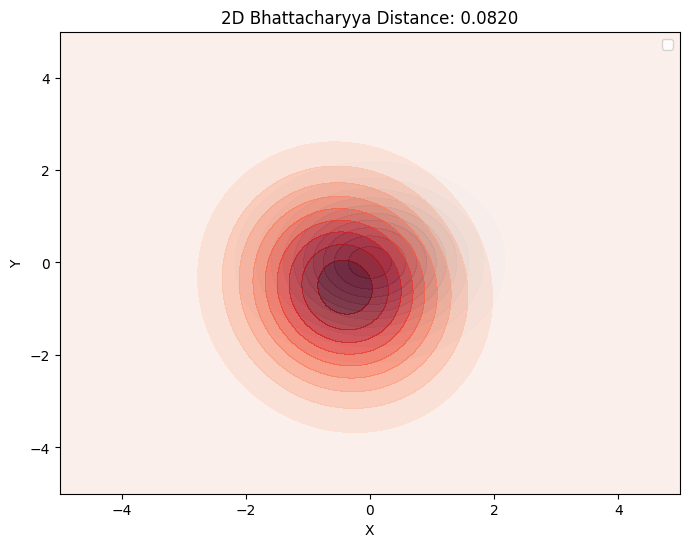

Closest distance to 0.1: 0.0055 (achieved distance: 0.1055)


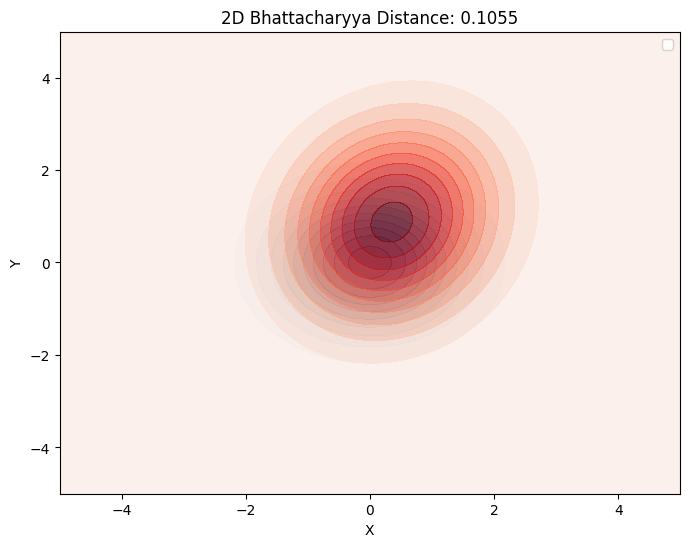

Closest distance to 0.2: 0.0068 (achieved distance: 0.1932)


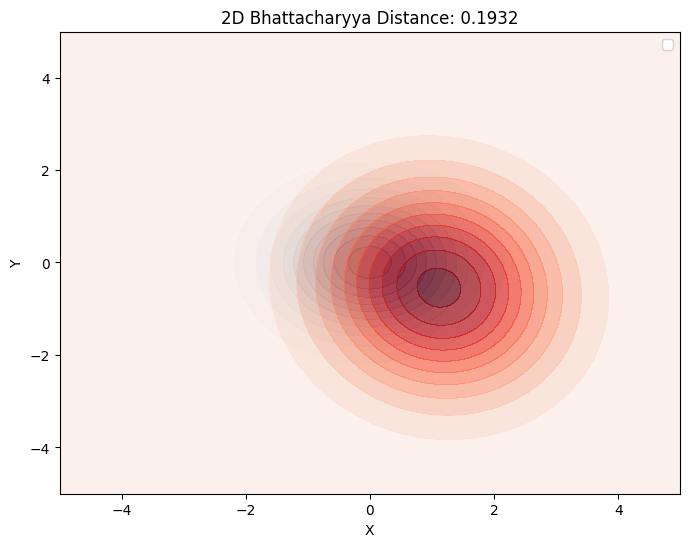

Closest distance to 0.30000000000000004: 0.0011 (achieved distance: 0.2989)


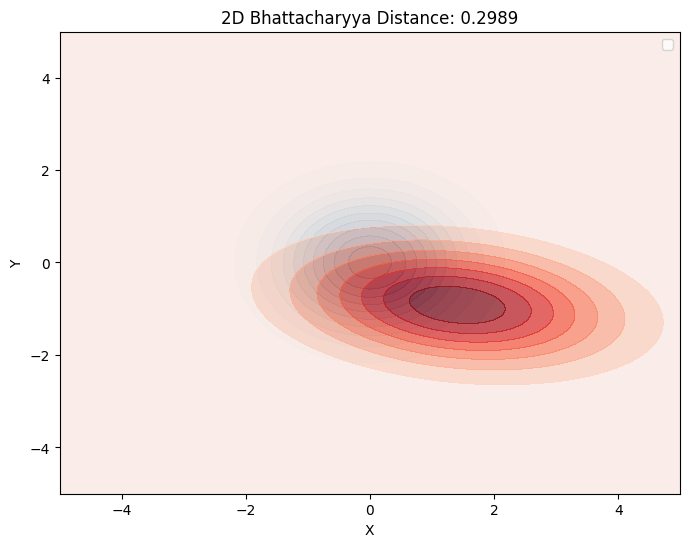

Closest distance to 0.4: 0.0024 (achieved distance: 0.3976)


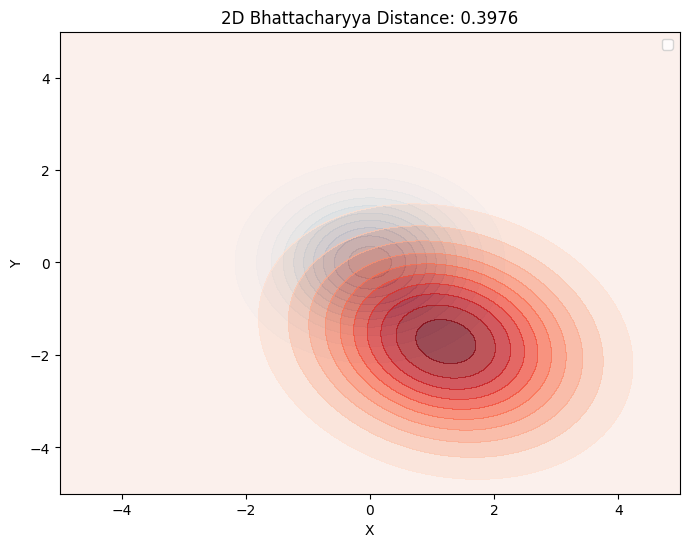

Closest distance to 0.5: 0.0005 (achieved distance: 0.4995)


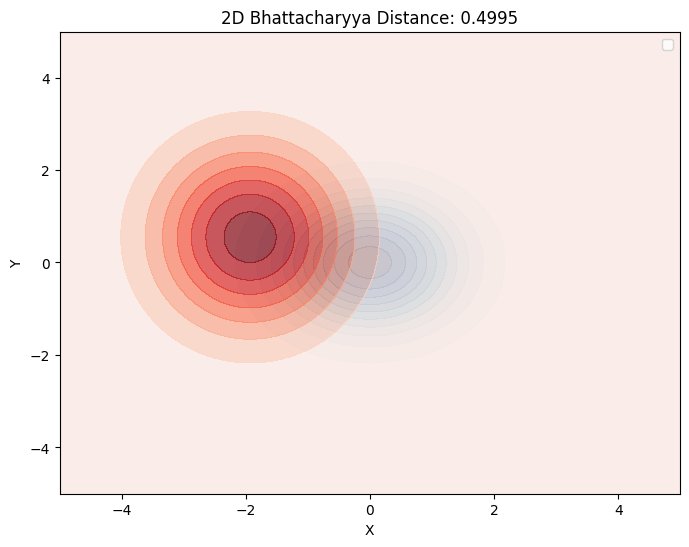

Closest distance to 0.6000000000000001: 0.0041 (achieved distance: 0.6041)


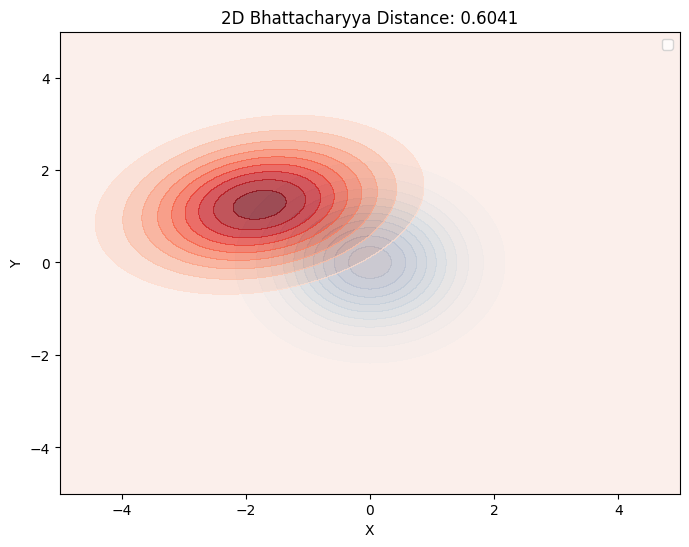

Closest distance to 0.7000000000000001: 0.0016 (achieved distance: 0.7016)


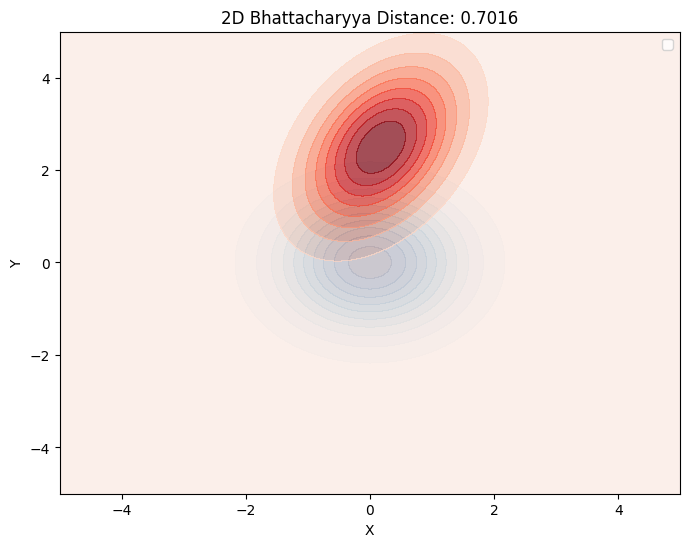

Closest distance to 0.8: 0.0004 (achieved distance: 0.7996)


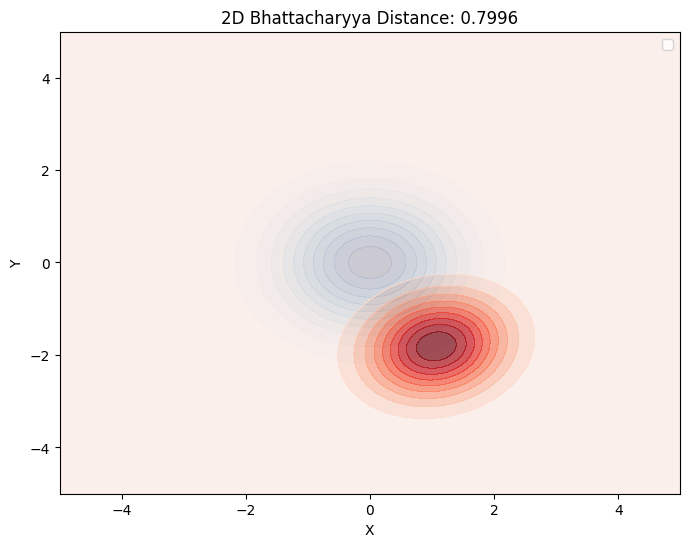

Closest distance to 0.9: 0.0047 (achieved distance: 0.9047)


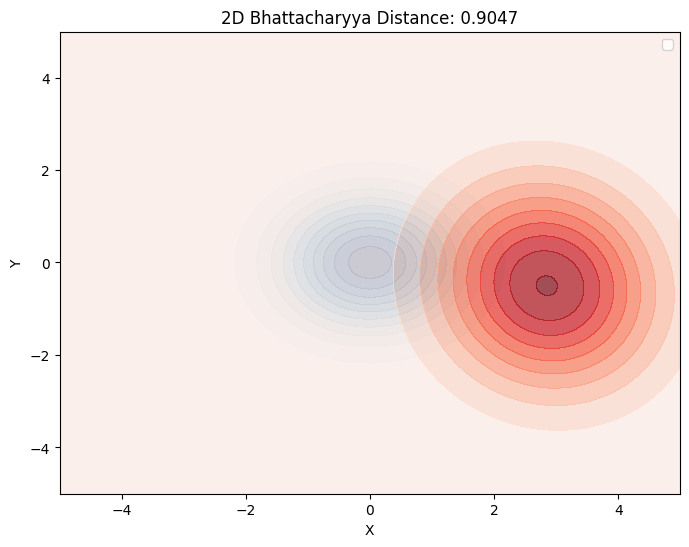

Closest distance to 1.0: 0.0057 (achieved distance: 0.9943)


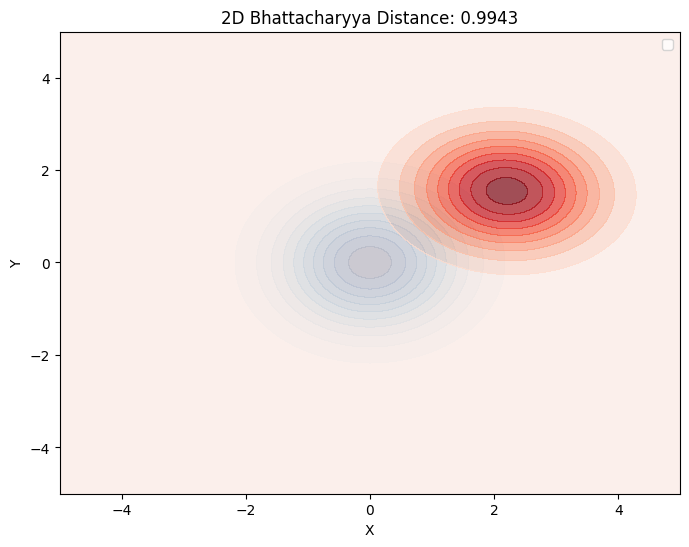

In [3]:
# Define mean1 and cov1 (you can adjust these values as needed)
mean1 = np.array([0, 0])  # Mean of the first distribution
cov1 = np.array([[1, 0], [0, 1]])  # Covariance matrix of the first distribution 

# Target distances (for demonstration)
target_distances = np.arange(0, 1.1, 0.1).tolist()  # Example: <0.5, ~0.5, >0.5

for target_distance in target_distances:
    best_mean2 = None
    best_cov2 = None
    min_diff = float('inf')

    for i in range(100):  # Try different configurations (adjust range as needed)
        # Vary mean2 and cov2 randomly (you'll need to adjust the ranges)
        mean2 = np.array([np.random.uniform(-3, 3), np.random.uniform(-3, 3)])  # Adjust range
        cov2 = np.array([[np.random.uniform(0.5, 3), np.random.uniform(-0.5, 0.5)],
                         [np.random.uniform(-0.5, 0.5), np.random.uniform(0.5, 3)]]) # Adjust range and ensure positive definite

        # Ensure positive definite covariance matrix (important!)
        cov2 = (cov2 + cov2.T) / 2  # Make symmetric
        eigenvalues, eigenvectors = np.linalg.eig(cov2)
        eigenvalues = np.maximum(eigenvalues, 0.1) # Ensure eigenvalues are positive
        cov2 = eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T


        distance = bhattacharyya_distance_2d_normal_discretized(mean1, cov1, mean2, cov2, grid_size=200)

        diff = abs(distance - target_distance)
        if diff < min_diff:
            min_diff = diff
            best_mean2 = mean2
            best_cov2 = cov2
            best_distance = distance # Update best distance

    print(f"Closest distance to {target_distance}: {min_diff:.4f} (achieved distance: {best_distance:.4f})")

    # Plot the best configuration found
    x, y = np.mgrid[-5:5:.01, -5:5:.01]
    pos = np.dstack((x, y))
    rv1 = multivariate_normal(mean1, cov1)
    rv2 = multivariate_normal(best_mean2, best_cov2) # Use the best mean2 and cov2

    plt.figure(figsize=(8, 6))
    plt.contourf(x, y, rv1.pdf(pos), levels=10, cmap="Blues", alpha=0.7, label="Distribution 1")
    plt.contourf(x, y, rv2.pdf(pos), levels=10, cmap="Reds", alpha=0.7, label="Distribution 2")
    plt.title(f"2D Bhattacharyya Distance: {best_distance:.4f}")  # Use best_distance in title
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()


# Hellinger distance

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def hellinger_distance_2d_normal(mean1, cov1, mean2, cov2):
  """
  Calculates the Hellinger distance between two 2D multivariate normal distributions 
  using the analytical formula.

  Args:
    mean1: Mean of the first distribution (numpy array of size 2).
    cov1: Covariance matrix of the first distribution (2x2 numpy array).
    mean2: Mean of the second distribution (numpy array of size 2).
    cov2: Covariance matrix of the second distribution (2x2 numpy array).

  Returns:
    The Hellinger distance between the two distributions.
  """

  det_cov1 = np.linalg.det(cov1)
  det_cov2 = np.linalg.det(cov2)
  det_cov_sum = np.linalg.det((cov1 + cov2) / 2)

  exponent = -0.125 * (mean1 - mean2).T @ np.linalg.inv((cov1 + cov2) / 2) @ (mean1 - mean2)

  return np.sqrt(1 - np.sqrt((2 * np.sqrt(det_cov1) * np.sqrt(det_cov2)) / (det_cov_sum)) * np.exp(exponent))

Closest distance to 0.0: 0.1659 (achieved distance: 0.1659)


C:\Users\manse\AppData\Local\Temp\ipykernel_4092\445200653.py:26: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 - np.sqrt((2 * np.sqrt(det_cov1) * np.sqrt(det_cov2)) / (det_cov_sum)) * np.exp(exponent))
C:\Users\manse\AppData\Local\Temp\ipykernel_4092\2630375167.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(x, y, rv1.pdf(pos), levels=20, cmap="Blues", alpha=0.7, label="Distribution 1")
C:\Users\manse\AppData\Local\Temp\ipykernel_4092\2630375167.py:44: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(x, y, rv2.pdf(pos), levels=20, cmap="Reds", alpha=0.7, label="Distribution 2")
C:\Users\manse\AppData\Local\Temp\ipykernel_4092\2630375167.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


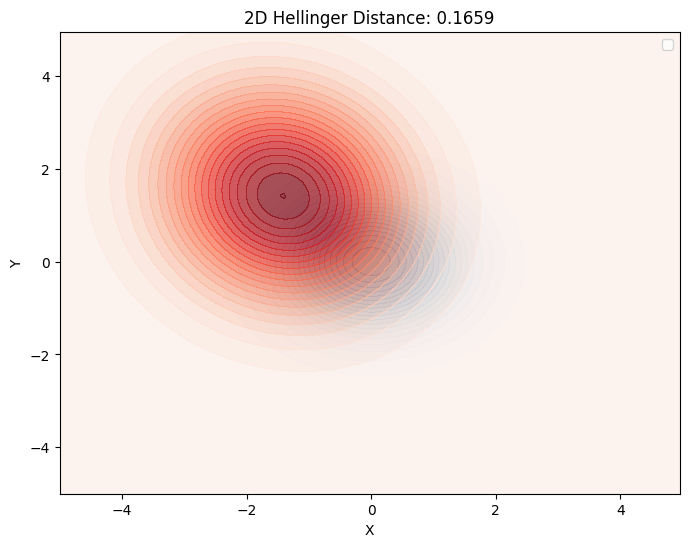

Closest distance to 0.1: 0.0320 (achieved distance: 0.0680)


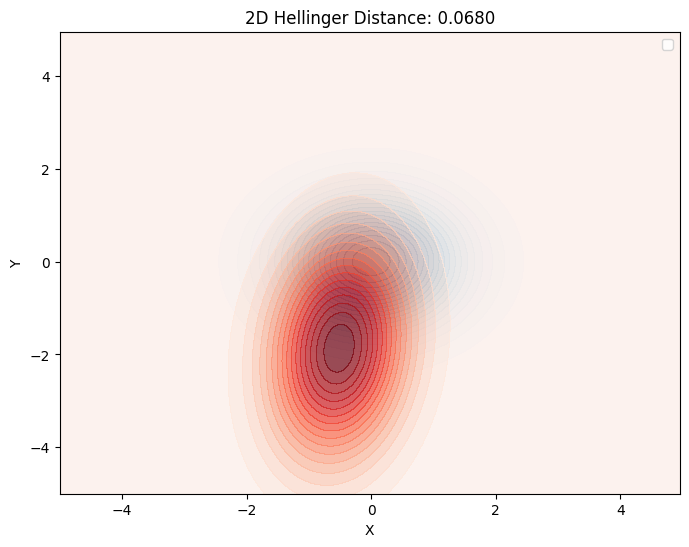

Closest distance to 0.2: 0.0037 (achieved distance: 0.2037)


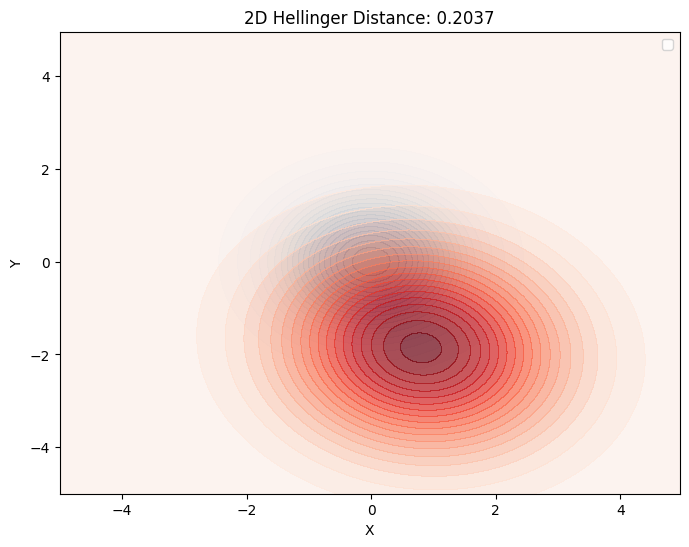

Closest distance to 0.30000000000000004: 0.0030 (achieved distance: 0.2970)


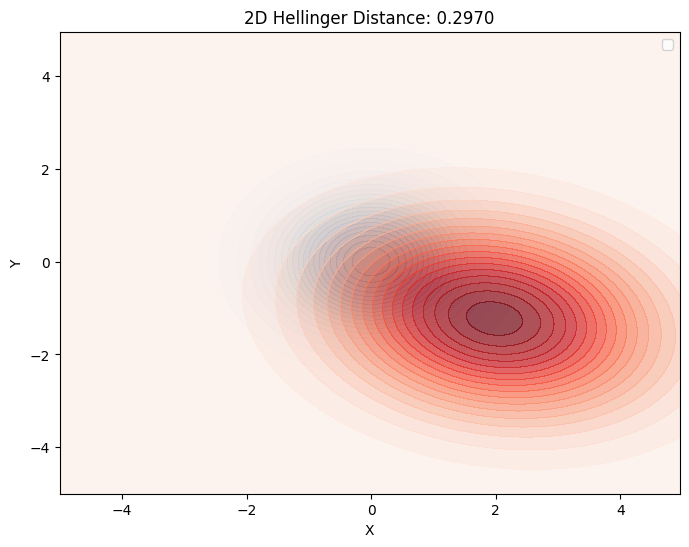

Closest distance to 0.4: 0.0018 (achieved distance: 0.3982)


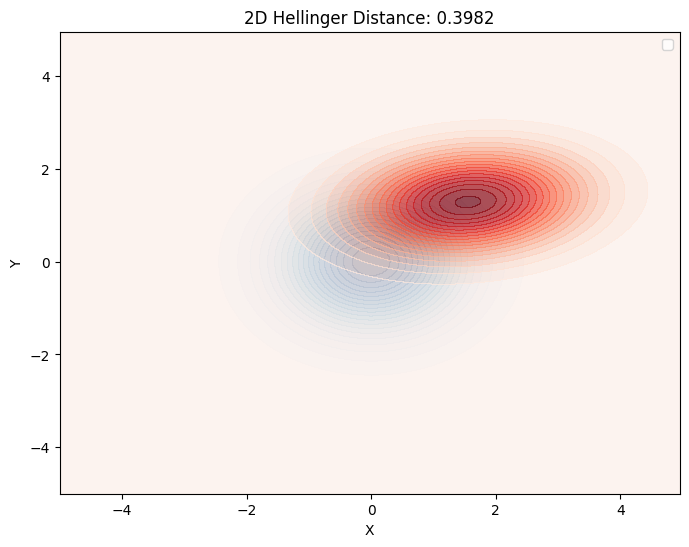

Closest distance to 0.5: 0.0031 (achieved distance: 0.5031)


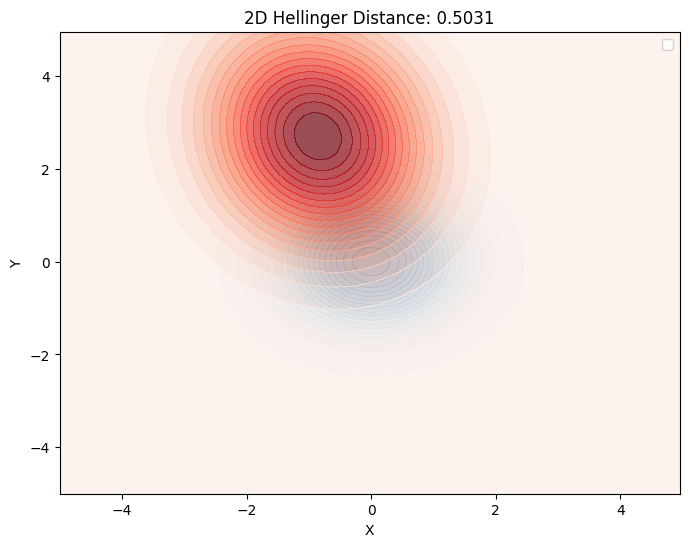

Closest distance to 0.6000000000000001: 0.0006 (achieved distance: 0.6006)


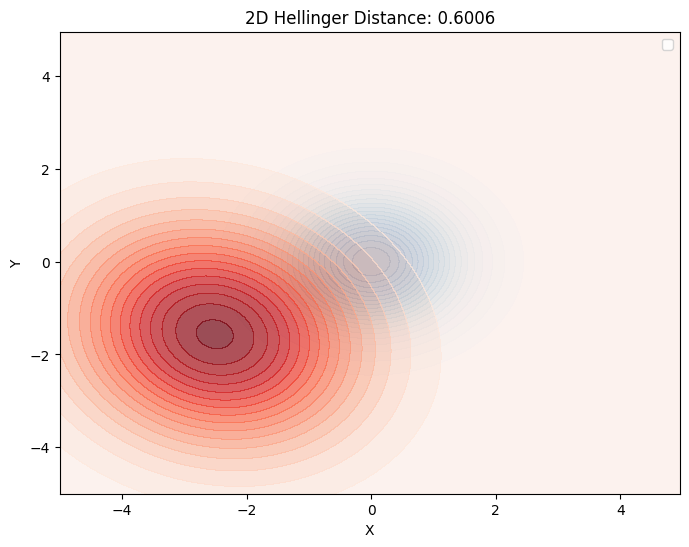

Closest distance to 0.7000000000000001: 0.0002 (achieved distance: 0.6998)


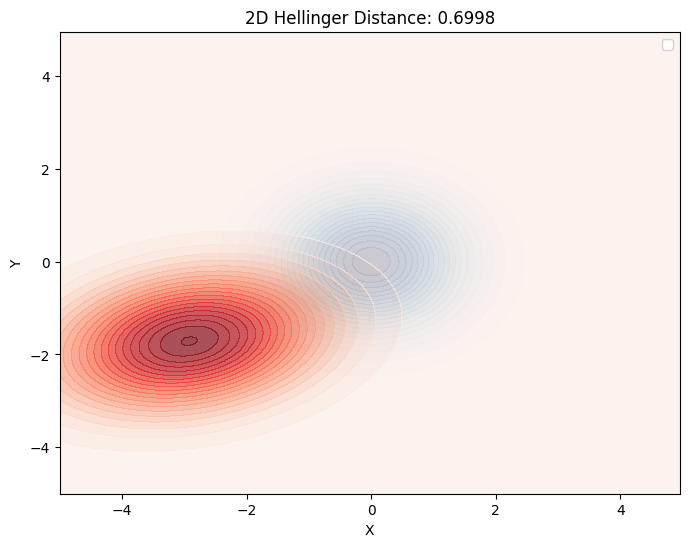

Closest distance to 0.8: 0.0025 (achieved distance: 0.7975)


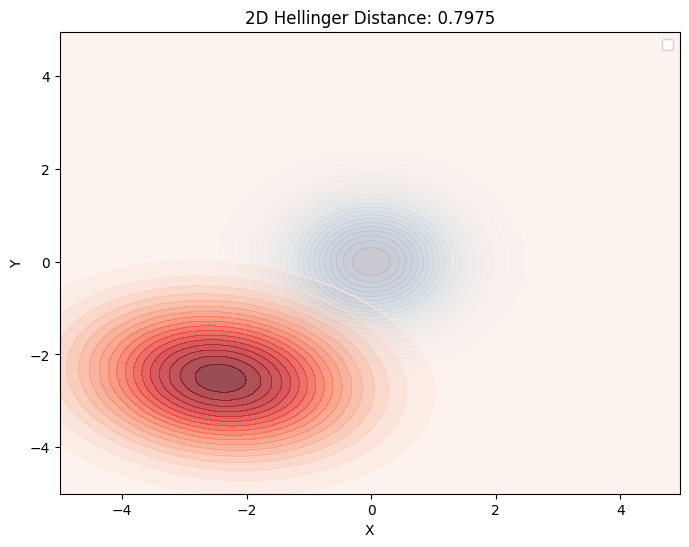

Closest distance to 0.9: 0.0374 (achieved distance: 0.8626)


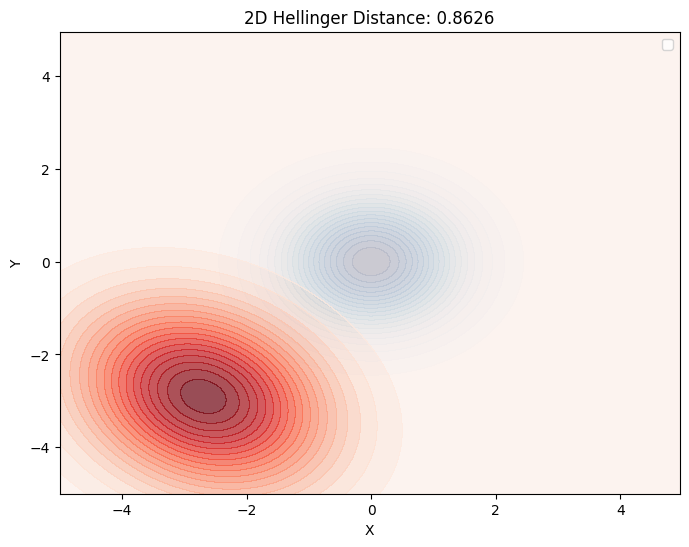

Closest distance to 1.0: 0.1249 (achieved distance: 0.8751)


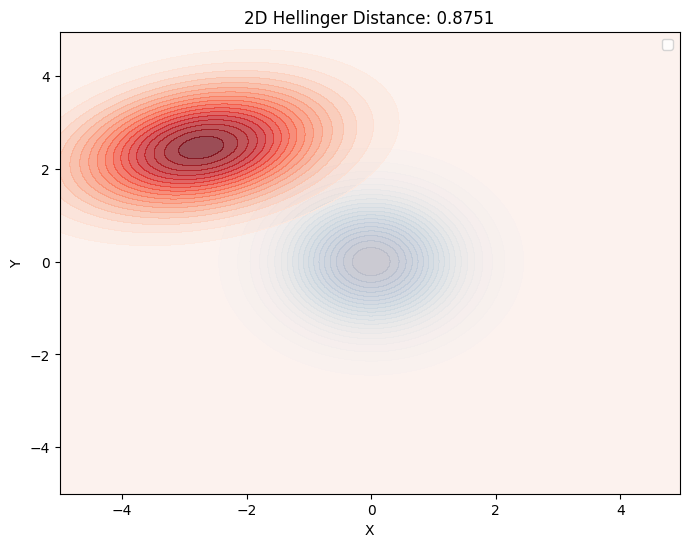

In [5]:
# Define mean1 and cov1 (you can adjust these values as needed)
mean1 = np.array([0, 0])  # Mean of the first distribution
cov1 = np.array([[1, 0], [0, 1]])  # Covariance matrix of the first distribution 

# Target distances (for demonstration)
target_distances = np.arange(0, 1.1, 0.1).tolist() # Example: <0.5, ~0.5, >0.5

for target_distance in target_distances:
    best_mean2 = None
    best_cov2 = None
    min_diff = float('inf')

    for i in range(100):  # Try different configurations (adjust range as needed)
        # Vary mean2 and cov2 randomly (you'll need to adjust the ranges)
        mean2 = np.array([np.random.uniform(-3, 3), np.random.uniform(-3, 3)])  # Adjust range
        cov2 = np.array([[np.random.uniform(0.5, 3), np.random.uniform(-0.5, 0.5)],
                         [np.random.uniform(-0.5, 0.5), np.random.uniform(0.5, 3)]]) # Adjust range and ensure positive definite

        # Ensure positive definite covariance matrix (important!)
        cov2 = (cov2 + cov2.T) / 2  # Make symmetric
        eigenvalues, eigenvectors = np.linalg.eig(cov2)
        eigenvalues = np.maximum(eigenvalues, 0.1) # Ensure eigenvalues are positive
        cov2 = eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T

        distance = hellinger_distance_2d_normal(mean1, cov1, mean2, cov2)

        diff = abs(distance - target_distance)
        if diff < min_diff:
            min_diff = diff
            best_mean2 = mean2
            best_cov2 = cov2
            best_distance = distance # Update best distance

    print(f"Closest distance to {target_distance}: {min_diff:.4f} (achieved distance: {best_distance:.4f})")

    # Plot the best configuration found
    x, y = np.mgrid[-5:5:.05, -5:5:.05]
    pos = np.dstack((x, y))
    rv1 = multivariate_normal(mean1, cov1)
    rv2 = multivariate_normal(best_mean2, best_cov2) # Use the best mean2 and cov2

    plt.figure(figsize=(8, 6))
    plt.contourf(x, y, rv1.pdf(pos), levels=20, cmap="Blues", alpha=0.7, label="Distribution 1")
    plt.contourf(x, y, rv2.pdf(pos), levels=20, cmap="Reds", alpha=0.7, label="Distribution 2")
    plt.title(f"2D Hellinger Distance: {best_distance:.4f}")  # Use best_distance in title
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

# MMD

In [6]:
def mmd_2d_normal(mean1, cov1, mean2, cov2, kernel='rbf', gamma=1.0):
    """
    Calculates the MMD between two 2D multivariate normal distributions.

    Args:
        mean1: Mean of the first distribution (numpy array of size 2).
        cov1: Covariance matrix of the first distribution (2x2 numpy array).
        mean2: Mean of the second distribution (numpy array of size 2).
        cov2: Covariance matrix of the second distribution (2x2 numpy array).
        kernel: The kernel to use ('linear' or 'rbf').  Default: 'rbf'
        gamma: Bandwidth parameter for the RBF kernel. Only used if kernel='rbf'.

    Returns:
        The MMD between the two distributions.
    """

    if kernel == 'linear':
        term1 = mean1.T @ mean1 + np.trace(cov1)
        term2 = mean2.T @ mean2 + np.trace(cov2)
        term3 = 2 * mean1.T @ mean2 + 2*np.trace(np.sqrt(cov1 @ cov2)) # this is the main change, not ideal
        mmd2 = term1 + term2 - term3
        return np.sqrt(mmd2) if mmd2 > 0 else 0 # Ensure non-negative and take sqrt

    elif kernel == 'rbf':  # Gaussian kernel
        k_xx = np.exp(-gamma * (mean1 - mean1).T @ np.linalg.inv((cov1+cov1)/2) @ (mean1 - mean1) / 2) + np.exp(-gamma * (mean1 - mean1).T @ np.linalg.inv((cov1+cov1)/2) @ (mean1 - mean1) / 2)
        k_yy = np.exp(-gamma * (mean2 - mean2).T @ np.linalg.inv((cov2+cov2)/2) @ (mean2 - mean2) / 2) + np.exp(-gamma * (mean2 - mean2).T @ np.linalg.inv((cov2+cov2)/2) @ (mean2 - mean2) / 2)
        k_xy = 2*np.exp(-gamma * (mean1 - mean2).T @ np.linalg.inv((cov1+cov2)/2) @ (mean1 - mean2) / 2)
        mmd2 = k_xx + k_yy - k_xy
        return np.sqrt(mmd2) if mmd2 > 0 else 0

    else:
        raise ValueError("Invalid kernel. Choose 'linear' or 'rbf'.")

Closest distance to 0: 1.4215 (achieved distance: 1.4215)


C:\Users\manse\AppData\Local\Temp\ipykernel_4092\887781129.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(x, y, rv1.pdf(pos), levels=20, cmap="Blues", alpha=0.7, label="Distribution 1")
C:\Users\manse\AppData\Local\Temp\ipykernel_4092\887781129.py:44: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(x, y, rv2.pdf(pos), levels=20, cmap="Reds", alpha=0.7, label="Distribution 2")
C:\Users\manse\AppData\Local\Temp\ipykernel_4092\887781129.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


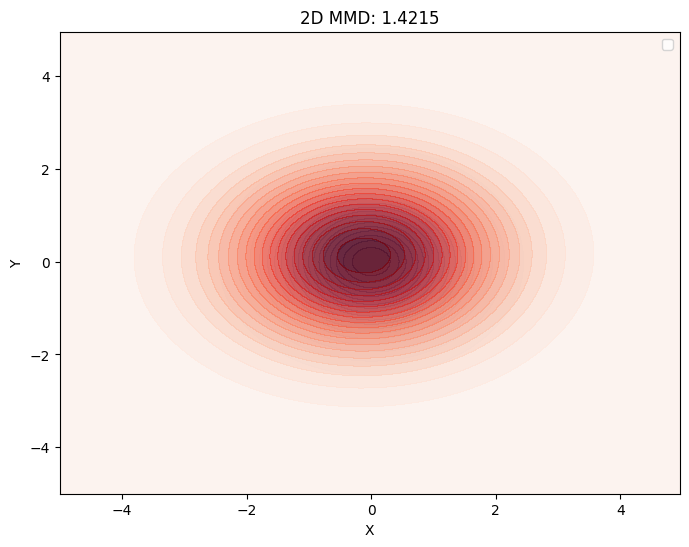

Closest distance to 1: 0.4249 (achieved distance: 1.4249)


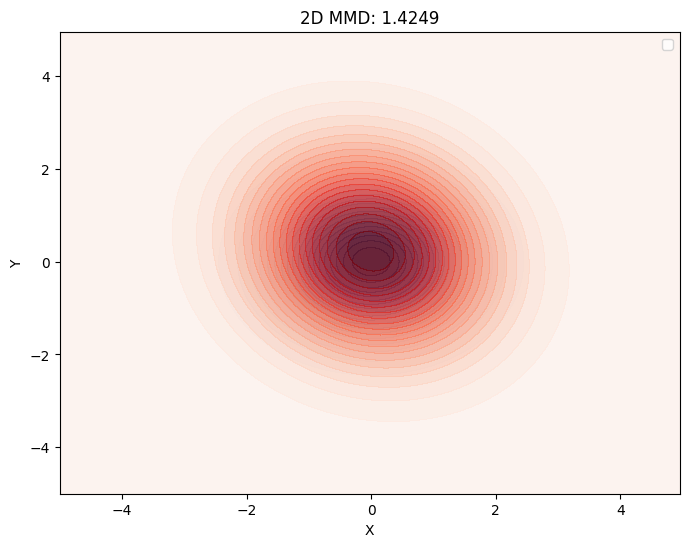

Closest distance to 2: 0.0002 (achieved distance: 1.9998)


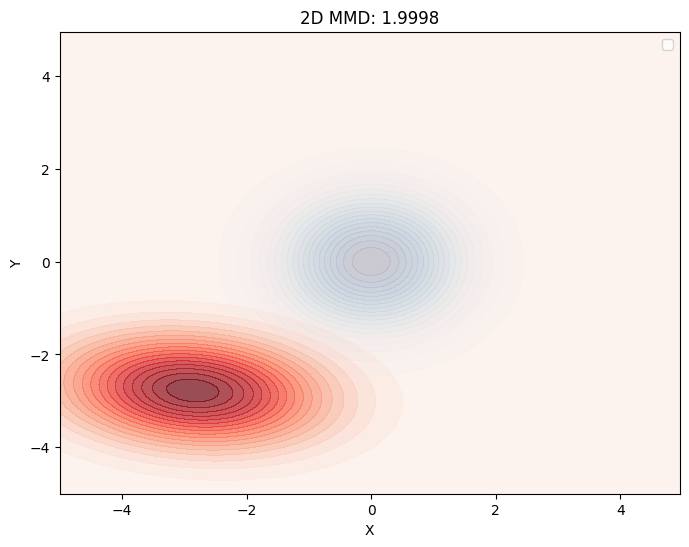

Closest distance to 3: 1.0005 (achieved distance: 1.9995)


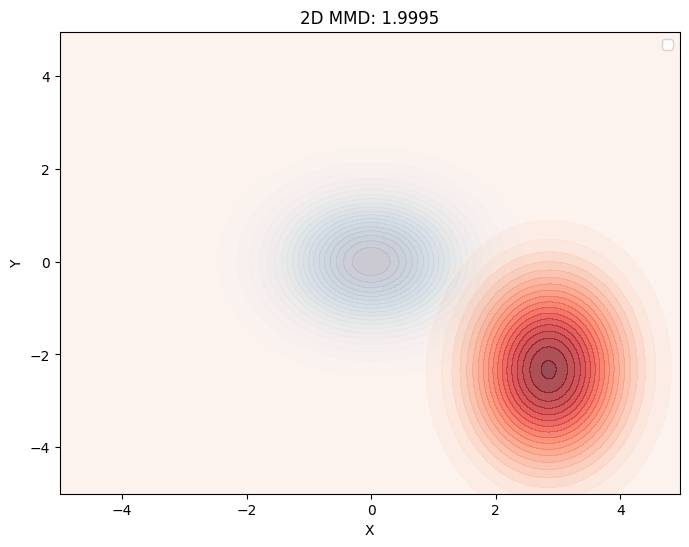

Closest distance to 4: 2.0009 (achieved distance: 1.9991)


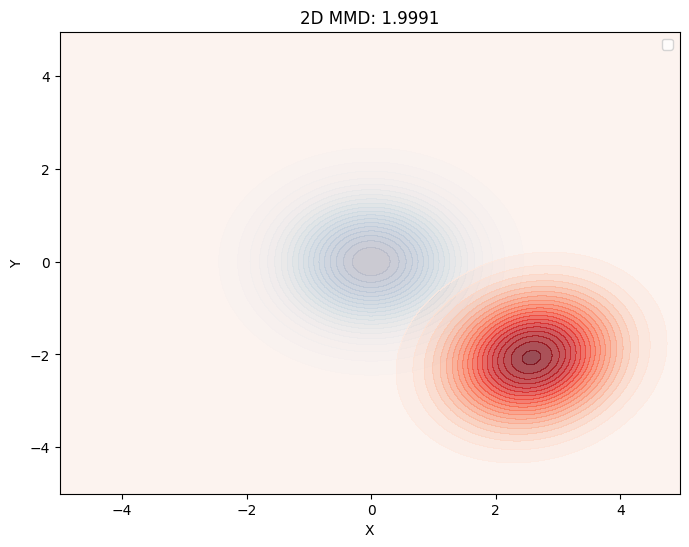

Closest distance to 5: 3.0003 (achieved distance: 1.9997)


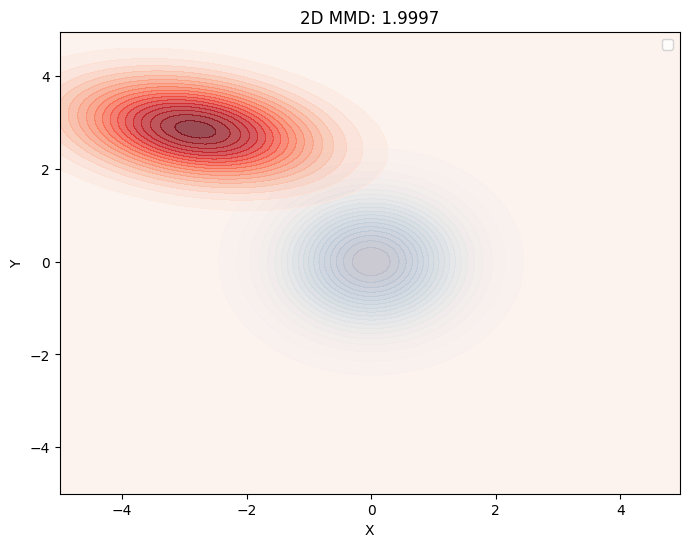

Closest distance to 6: 4.0001 (achieved distance: 1.9999)


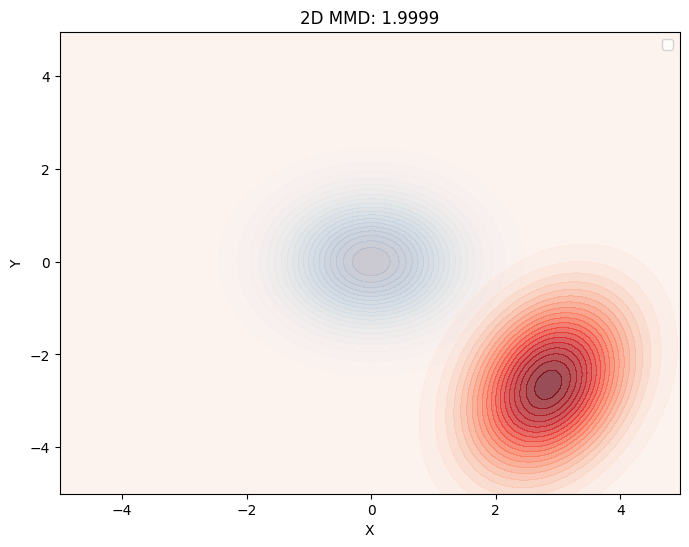

Closest distance to 7: 5.0007 (achieved distance: 1.9993)


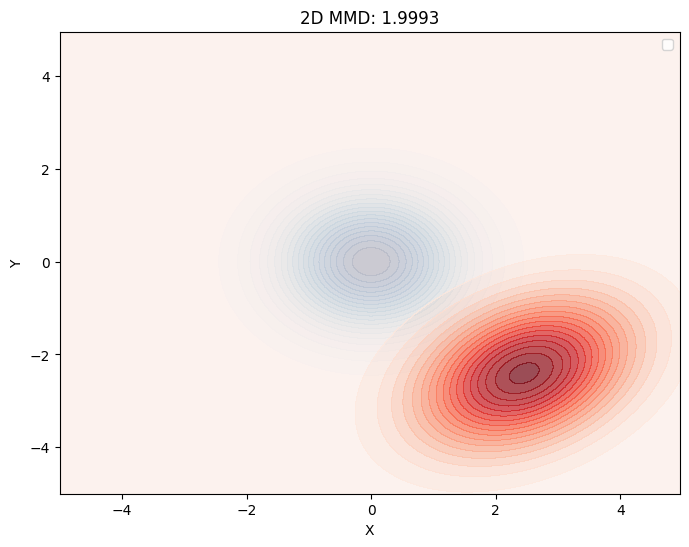

Closest distance to 8: 6.0009 (achieved distance: 1.9991)


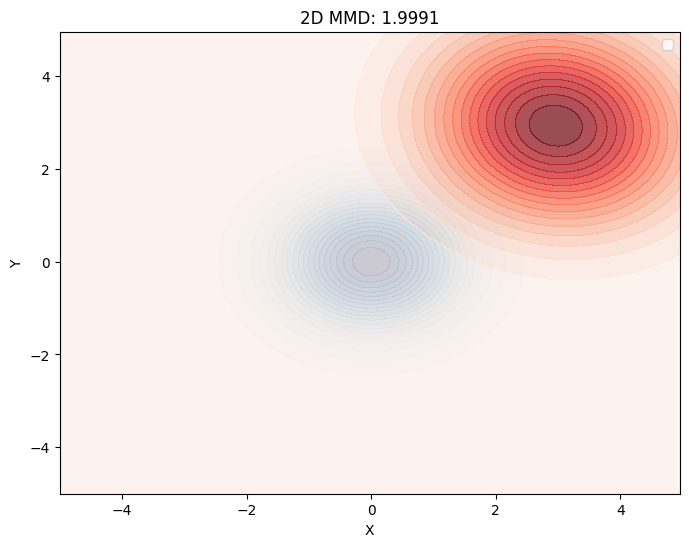

Closest distance to 9: 7.0002 (achieved distance: 1.9998)


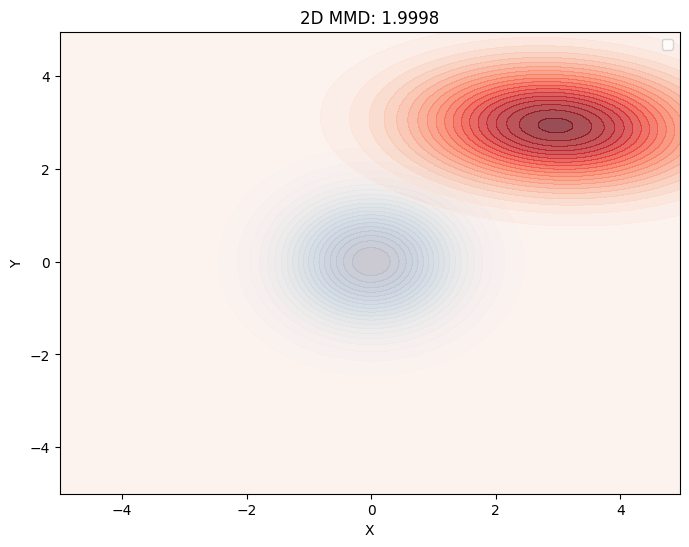

Closest distance to 10: 8.0001 (achieved distance: 1.9999)


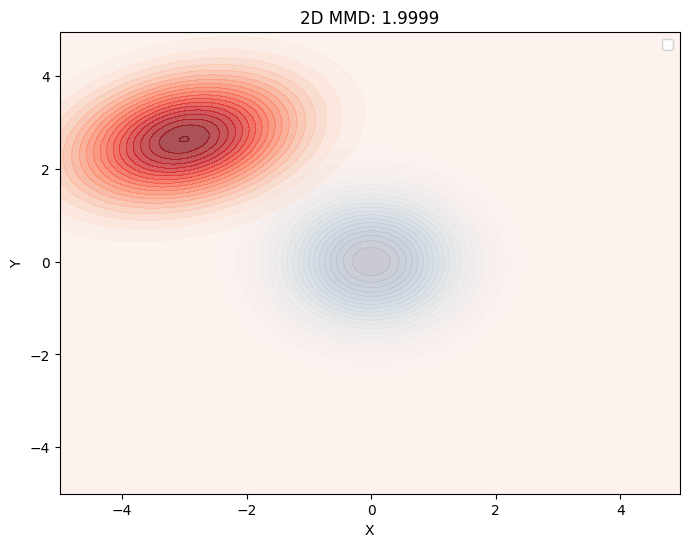

In [9]:
# Define mean1 and cov1 (you can adjust these values as needed)
mean1 = np.array([0, 0])  # Mean of the first distribution
cov1 = np.array([[1, 0], [0, 1]])  # Covariance matrix of the first distribution 

# Target distances (for demonstration)
target_distances = np.arange(0, 11, 1).tolist() # Example: <0.5, ~0.5, >0.5

for target_distance in target_distances:
    best_mean2 = None
    best_cov2 = None
    min_diff = float('inf')

    for i in range(100):  # Try different configurations (adjust range as needed)
        # Vary mean2 and cov2 randomly (you'll need to adjust the ranges)
        mean2 = np.array([np.random.uniform(-3, 3), np.random.uniform(-3, 3)])  # Adjust range
        cov2 = np.array([[np.random.uniform(0.5, 3), np.random.uniform(-0.5, 0.5)],
                         [np.random.uniform(-0.5, 0.5), np.random.uniform(0.5, 3)]]) # Adjust range and ensure positive definite

        # Ensure positive definite covariance matrix (important!)
        cov2 = (cov2 + cov2.T) / 2  # Make symmetric
        eigenvalues, eigenvectors = np.linalg.eig(cov2)
        eigenvalues = np.maximum(eigenvalues, 0.1) # Ensure eigenvalues are positive
        cov2 = eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T

        distance = mmd_2d_normal(mean1, cov1, mean2, cov2)

        diff = abs(distance - target_distance)
        if diff < min_diff:
            min_diff = diff
            best_mean2 = mean2
            best_cov2 = cov2
            best_distance = distance # Update best distance

    print(f"Closest distance to {target_distance}: {min_diff:.4f} (achieved distance: {best_distance:.4f})")

    # Plot the best configuration found
    x, y = np.mgrid[-5:5:.05, -5:5:.05]
    pos = np.dstack((x, y))
    rv1 = multivariate_normal(mean1, cov1)
    rv2 = multivariate_normal(best_mean2, best_cov2) # Use the best mean2 and cov2

    plt.figure(figsize=(8, 6))
    plt.contourf(x, y, rv1.pdf(pos), levels=20, cmap="Blues", alpha=0.7, label="Distribution 1")
    plt.contourf(x, y, rv2.pdf(pos), levels=20, cmap="Reds", alpha=0.7, label="Distribution 2")
    plt.title(f"2D MMD: {best_distance:.4f}")  # Use best_distance in title
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()